# Variation due to `word2vec`'s random initialisation

 - fairly small at the word analogy task

In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
def get_exp_ids_for_reruns_of_word2vec(corpus='amazon_grouped-tagged', rep=0):
    query_dict = {
        'expansions__use_similarity': 0, 
          'expansions__neighbour_strategy':'linear',
          'expansions__vectors__dimensionality': 100, 
          'document_features_ev': 'AN+NN', 
          'document_features_tr': 'J+N+AN+NN', 
          'expansions__allow_overlap': False,
          'expansions__entries_of': None,
          'expansions__vectors__algorithm': 'word2vec',
          'expansions__vectors__composer__in': ['Add', 'Mult', 'Left', 'Right'], # todo Verb???
          'expansions__vectors__unlabelled': 'wiki',
          'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
          'expansions__noise': 0,
          'expansions__use_similarity': 0, 
          'expansions__k':3,
          'expansions__vectors__unlabelled_percentage': 15,
          'expansions__vectors__rep': rep,
          'labelled':corpus}
    return Experiment.objects.filter(**query_dict).values_list('id', flat=True)

[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
Composer has 6000 values
rep has 6000 values
Accuracy has 6000 values
folds has 6000 values


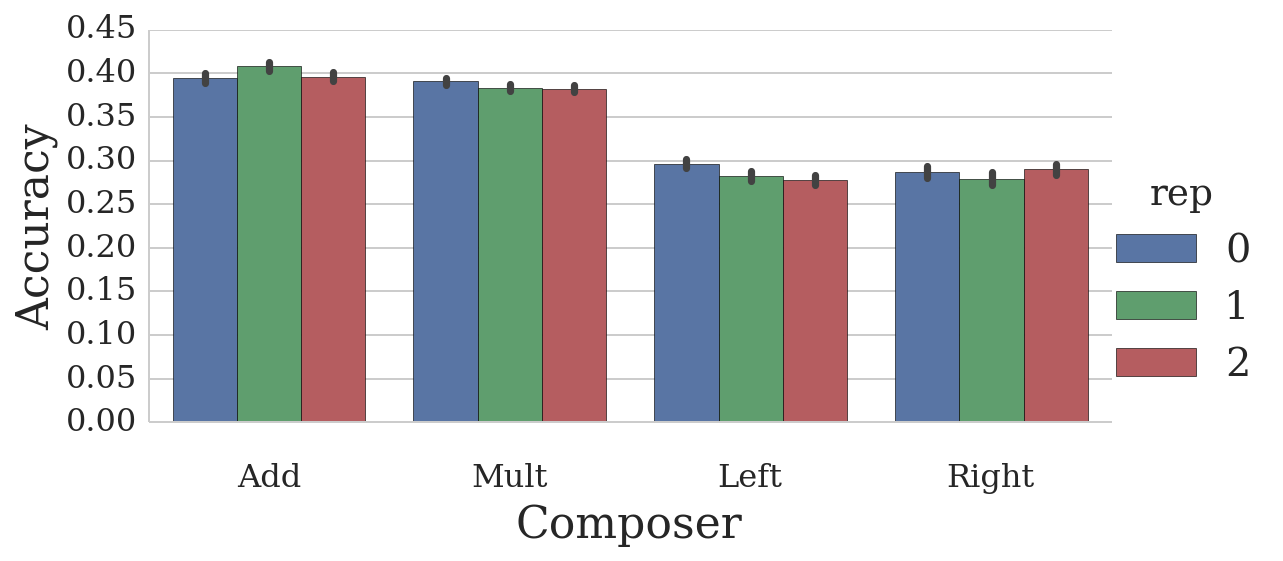

In [16]:
from itertools import chain
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

ids = list(chain.from_iterable(get_exp_ids_for_reruns_of_word2vec(rep=r) for r in [0, 1, 2]))
print(ids)
df = dataframe_from_exp_ids(ids, fields_to_include={'rep':'expansions__vectors__rep',
                                                    'Composer': 'expansions__vectors__composer'})
sns.factorplot(data=df, x='Composer', y='Accuracy', hue='rep', 
               hue_order='0 1 2'.split(), 
               kind='bar', ci=68, aspect=2);
plt.savefig('plot-w2v_random_init_var.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[87, 88, 89, 90, 83, 84, 85, 86, 324, 325, 326, 327]
Composer has 6000 values
rep has 6000 values
Accuracy has 6000 values
folds has 6000 values


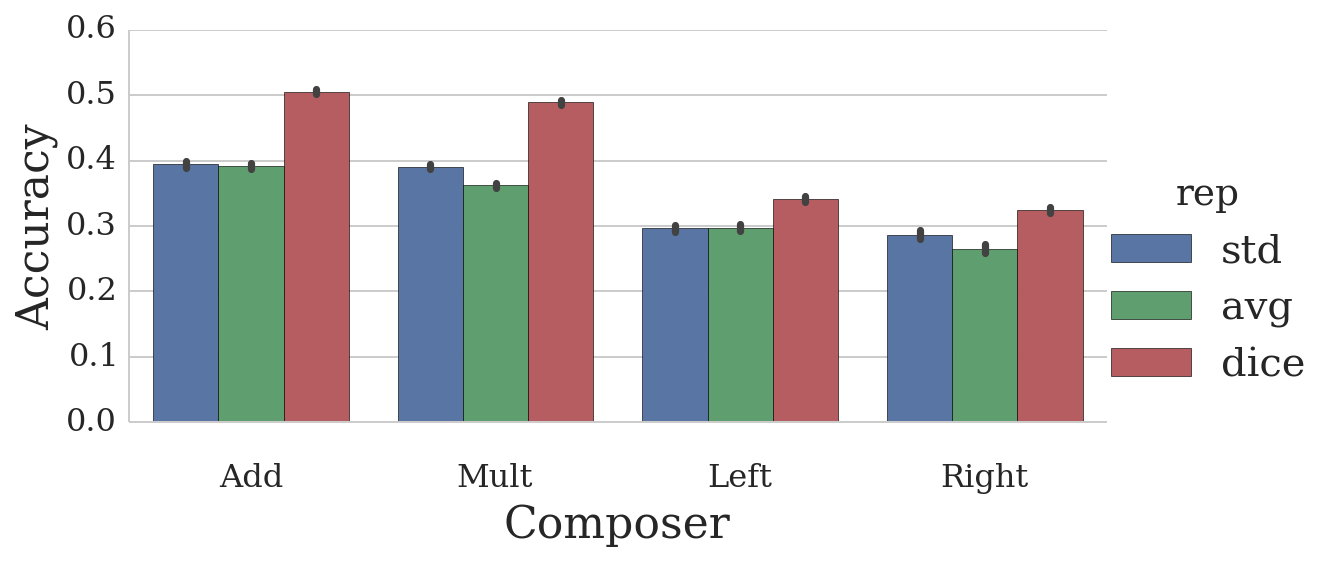

In [18]:
ids = list(chain.from_iterable(get_exp_ids_for_reruns_of_word2vec(rep=r) for r in [0, -1, -2]))
print(ids)
df = dataframe_from_exp_ids(ids, fields_to_include={'rep':'expansions__vectors__rep',
                                                    'Composer': 'expansions__vectors__composer'})

df.replace({'rep':{'0':'std', '-1':'avg', '-2':'dice'}}, inplace=True)
sns.factorplot(data=df, x='Composer', y='Accuracy', hue='rep', 
               hue_order='std avg dice'.split(), 
               kind='bar', ci=68, aspect=2);
plt.savefig('plot-w2v_random_init_boost.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [19]:
from gui.user_code import get_demsar_params
print(ids)
signif_table, _, _ = get_demsar_params(ids, name_format=['expansions__vectors__rep'])
signif_table

[87, 88, 89, 90, 83, 84, 85, 86, 324, 325, 326, 327]


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,0,0.393767,0,0.390803,0.002964,0.634,False
1,0,0.393767,0,0.296534,0.097233,0.000,True
2,0,0.393767,0,0.286907,0.106860,0.000,True
3,0,0.393767,-1,0.391195,0.002572,0.724,False
4,0,0.393767,-1,0.362426,0.031341,0.000,True
5,0,0.393767,-1,0.297342,0.096425,0.000,True
6,0,0.393767,-1,0.265478,0.128289,0.000,True
7,0,0.393767,-2,0.505077,0.111310,0.000,True
8,0,0.393767,-2,0.489265,0.095498,0.000,True
9,0,0.393767,-2,0.341819,0.051948,0.000,True


# Compare unigram vectors between multiple runs
How many of the top `n` neighbour of some entries are the same accross multiple runs

In [20]:
from glob import glob
from discoutils.thesaurus_loader import Vectors as V
from random import sample
from itertools import combinations

pattern = '/mnt/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/word2vec-wiki-15perc.unigr.strings.rep*'
files = sorted(glob(pattern))
thes = [V.from_tsv(f) for f in files]
for t in thes:
    t.init_sims(n_neighbors=100)

In [21]:
def dice(n1, n2):
    return 2 * len(set(n1) & set(n2))/ (len(n1) + len(n2))


def dice_loop(words, thes, log=False):
    dice_data = []
    for i,j in combinations(range(len(thes)), 2):
        pair_id = '%d-%r'%(i,j if j < 3 else 'A')
        if log:
            print('Doing pair', pair_id, flush=True)
        for num, word in enumerate(words):
            n1 = [x[0] for x in thes[i].get_nearest_neighbours(word)]
            n2 = [x[0] for x in thes[j].get_nearest_neighbours(word)]
            if n1 and n2:
                dice_data.append([pair_id, word, dice(n1, n2)])
    return dice_data

In [22]:
sampled_words = sample(list(thes[0].keys()), 5000)
dice_data = dice_loop(sampled_words, thes, log=True)

Doing pair 0-1
Doing pair 0-2
Doing pair 1-2


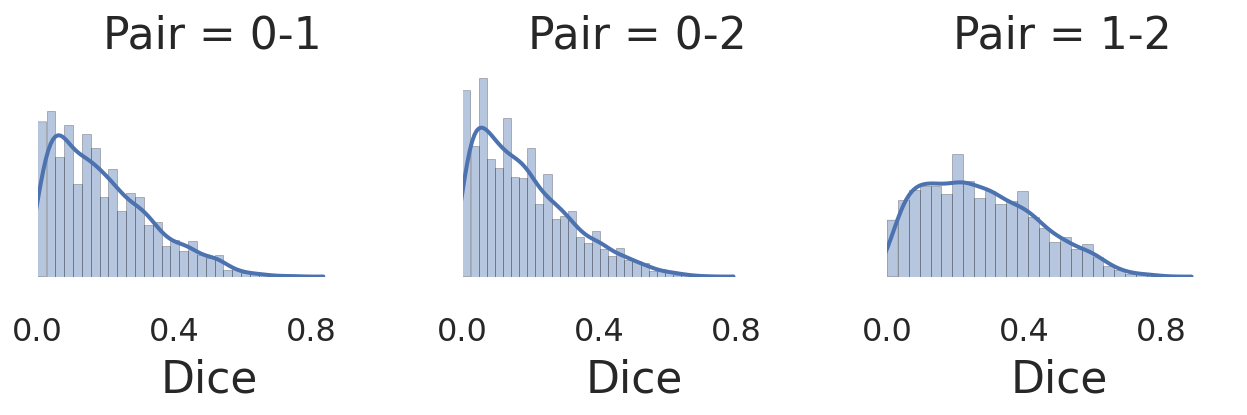

In [23]:
df3 = pd.DataFrame(dice_data, columns='Pair Word Dice'.split())
with sns.axes_style("white"):
    g = sns.FacetGrid(df3, col="Pair", col_wrap=3);
    g.map(sns.distplot, 'Dice', kde=True);

for ax in g.axes.flat:
    sparsify_axis_labels(ax)
    ax.set_xlim(0, 1.01)
    ax.set_yticklabels([])

sns.despine(left=True, bottom=True)
plt.savefig('plot-w2v_random_init_neigh_overlap.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Observations
Neighbours tend to be quite different over multiple runs, but the overall accuracy of the classification task changes very little
# Qualitative analysis
See below
Seems to me good neighbours (which seem sensible) tend to be the same across repeated runs

In [26]:
def multiway_dice(entry, thesauri):
    df = pd.DataFrame(dice_loop([entry], thesauri), columns='Pair Word Dice'.split())
    return df.Dice.mean()

In [46]:
df = compare_neighbours(thes, [0, 1, 2], words=['balkans/N', 'lesbian/J', 'ottawa/N', 'sneaker/N', 'essay/N', 'falsify/V', 'inborn/J'])
df['mw_dice'] = [multiway_dice(feat, thes[:-1]) for feat in df.index]
df.to_csv('compare_repeated_w2v.csv')
df.sort('mw_dice')

,0,1,2,mw_dice
balkans/N,"transcaucasia/N, transoxiana/N, chalukyas/N, o...","south-eastern/N, kastoria/N, interbellum/N, tr...","transcaucasia/N, apennines/UNK, peninsular/J, ...",0.12
inborn/J,"empathic/J, self-efficacy/N, depersonalization...","empathic/J, self-concept/N, uninhibited/J, pos...","nonverbal/J, salience/N, nde/N, self-harm/N",0.13
falsify/V,"substantiate/V, disprove/V, disbelieve/V, corr...","incriminate/V, false/J, wiretap/N, expunge/V","eye-witness/N, megrahi/N, falsified/J, groundl...",0.26
ottawa/N,"montreal/N, winnipeg/N, toronto/N, catharines/N","saskatoon/N, toronto/N, catharines/N, calgary/N","toronto/N, winnipeg/N, montreal/N, vancouver/N",0.35
sneaker/N,"pinstripe/N, necktie/N, sunglass/N, suspenders/N","sweatshirt/N, panties/N, tights/N, headband/N","bandana/N, kimono/N, overalls/N, leotard/N",0.42
lesbian/J,"gay/J, lesbian/N, transgender/J, bisexual/J","gay/J, transgender/J, transgendered/J, transge...","gay/J, transgendered/J, bisexual/N, transgender/N",0.49
essay/N,"pamphlet/N, monograph/N, poem/N, book/N","book/N, pamphlet/N, poem/N, monograph/N","pamphlet/N, book/N, poem/N, monograph/N",0.65


In [48]:
print(pd.DataFrame(df.stack()).to_latex())

\begin{tabular}{lll}
\toprule
          &   &                                                  0 \\
\midrule
balkans/N & 0 &  transcaucasia/N, transoxiana/N, chalukyas/N, o... \\
          & 1 &  south-eastern/N, kastoria/N, interbellum/N, tr... \\
          & 2 &  transcaucasia/N, apennines/UNK, peninsular/J, ... \\
          & mw\_dice &                                               0.12 \\
lesbian/J & 0 &        gay/J, lesbian/N, transgender/J, bisexual/J \\
          & 1 &  gay/J, transgender/J, transgendered/J, transge... \\
          & 2 &  gay/J, transgendered/J, bisexual/N, transgender/N \\
          & mw\_dice &                                               0.49 \\
ottawa/N & 0 &    montreal/N, winnipeg/N, toronto/N, catharines/N \\
          & 1 &    saskatoon/N, toronto/N, catharines/N, calgary/N \\
          & 2 &     toronto/N, winnipeg/N, montreal/N, vancouver/N \\
          & mw\_dice &                                               0.35 \\
sneaker/N & 0 &   pinstripe/N, 

In [55]:
df.head()

,0,1,2,mw_dice
balkans/N,"transcaucasia/N, transoxiana/N, chalukyas/N, o...","south-eastern/N, kastoria/N, interbellum/N, tr...","transcaucasia/N, apennines/UNK, peninsular/J, ...",0.12
lesbian/J,"gay/J, lesbian/N, transgender/J, bisexual/J","gay/J, transgender/J, transgendered/J, transge...","gay/J, transgendered/J, bisexual/N, transgender/N",0.49
ottawa/N,"montreal/N, winnipeg/N, toronto/N, catharines/N","saskatoon/N, toronto/N, catharines/N, calgary/N","toronto/N, winnipeg/N, montreal/N, vancouver/N",0.35
sneaker/N,"pinstripe/N, necktie/N, sunglass/N, suspenders/N","sweatshirt/N, panties/N, tights/N, headband/N","bandana/N, kimono/N, overalls/N, leotard/N",0.42
essay/N,"pamphlet/N, monograph/N, poem/N, book/N","book/N, pamphlet/N, poem/N, monograph/N","pamphlet/N, book/N, poem/N, monograph/N",0.65
